# **Correlacion de Pearson**

06 de Noviembre 2025

In [3]:
# Sección 1: Importo módulos necesarios para la realización del test
import pandas as pd             # Manipulación de datos
import numpy as np              # Cálculos numéricos
import matplotlib.pyplot as plt # Gráficos
from scipy import stats         # Test de correlación de Pearson

In [4]:
# Sección 2: Carga de base de datos

# Nombre del archivo CSV
pFile = '../data/SEMANA05_BASE07.csv'

# Importo la base de datos
DATA = pd.read_csv(pFile, sep=';', decimal=',', header=0, na_values=[""])
DATA.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Arbol,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
X1,3.3,3.4,3.4,3.5,3.6,3.6,3.7,3.7,3.8,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,5.0,5.1
X2,7.3,10.8,13.1,10.4,5.8,9.3,12.4,14.9,11.2,8.0,6.6,10.0,9.2,12.4,2.3,4.3,3.0,1.6,1.0


In [5]:
# Sección 3: Armo la base de datos final (sin datos faltantes)

# Columnas a utilizar
pos_X1, pos_X2 = 1, 2
idx  = [pos_X1, pos_X2]

# Armo la base de datos
nDATA = DATA.iloc[:, idx].dropna()

# Verifico número de filas
print(f"Filas base de datos original:   {DATA.shape[0]}")
print(f"Filas base de datos modificada: {nDATA.shape[0]}")
nDATA.T

Filas base de datos original:   19
Filas base de datos modificada: 19


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
X1,3.3,3.4,3.4,3.5,3.6,3.6,3.7,3.7,3.8,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,5.0,5.1
X2,7.3,10.8,13.1,10.4,5.8,9.3,12.4,14.9,11.2,8.0,6.6,10.0,9.2,12.4,2.3,4.3,3.0,1.6,1.0


In [6]:
# Sección 4: Obtención de las variables a correlacionar

X1 = nDATA.iloc[:, 0]
X2 = nDATA.iloc[:, 1]

In [7]:
# Sección 5: Control de tipos de datos

# Verificación del tipo de dato: serie
print(f"La variable X1 es instancia de serie: {isinstance(X1, pd.Series)}")
print(f"La variable X2 es instancia de serie: {isinstance(X2, pd.Series)}")

# Verificación del tipo de dato: numérico
print(f"La variable X1 es numérica:           {np.issubdtype(X1.dtype, np.number)}")
print(f"La variable X2 es numérica:           {np.issubdtype(X2.dtype, np.number)}")

La variable X1 es instancia de serie: True
La variable X2 es instancia de serie: True
La variable X1 es numérica:           True
La variable X2 es numérica:           True


In [8]:
# Sección 6: Verificaciones PRE análisis

# Verificación de normalidad (Test Shapiro-Wilk)
SHAPIRO_01 = stats.shapiro(X1)
SHAPIRO_02 = stats.shapiro(X2)

print(f"Shapiro-Wilk Test (X1): \t Estadístico = {SHAPIRO_01.statistic:.4f}\tp-valor = {SHAPIRO_01.pvalue:.4f}")
print(f"Shapiro-Wilk Test (X2): \t Estadístico = {SHAPIRO_02.statistic:.4f}\tp-valor = {SHAPIRO_02.pvalue:.4f}")

# Verificación de homogeneidad de varianzas (Test Bartlett)
BARTLETT = stats.bartlett(X1, X2)
print(f"Test de Bartlett (X1-X2): \t Estadístico = {BARTLETT.statistic:.4f}\tp-valor = {BARTLETT.pvalue:.4f}")

Shapiro-Wilk Test (X1): 	 Estadístico = 0.9213	p-valor = 0.1196
Shapiro-Wilk Test (X2): 	 Estadístico = 0.9546	p-valor = 0.4717
Test de Bartlett (X1-X2): 	 Estadístico = 49.3985	p-valor = 0.0000


In [9]:
# Sección 7: Realización del Test de Correlación de Pearson

alpha = 0.05

PEARSON = stats.pearsonr(X1, X2)
print(f"Coeficiente de correlación de Pearson: {PEARSON.statistic:.4f}")
print(f"p-valor: {PEARSON.pvalue:.4e}")

# Interpretación
if PEARSON.pvalue < alpha:
    print("➡️ Se rechaza H0: Existe correlación significativa entre X1 y X2.")
else:
    print("➡️ No se rechaza H0.")

Coeficiente de correlación de Pearson: -0.7177
p-valor: 5.4064e-04
➡️ Se rechaza H0: Existe correlación significativa entre X1 y X2.


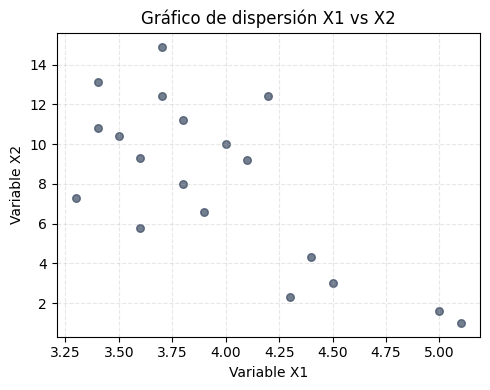

In [10]:
# Sección 8: Gráfico XY

plt.figure(figsize=(5, 4))
plt.scatter(X1, X2, color='#384860', alpha=0.7, edgecolor='#384860', s=30)
plt.xlabel("Variable X1", fontsize=10)
plt.ylabel("Variable X2", fontsize=10)
plt.title("Gráfico de dispersión X1 vs X2", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [11]:
# Sección 9: Generación de Tablas descriptivas

print("Cantidad de datos:", len(nDATA))

# Resumen medidas de posición X1
print("\nResumen X1:")
print(X1.describe())
# Resumen medidas de dispersión X1
print("Desviación estándar X1:", X1.std())
print("Varianza X1:", X1.var())

# Resumen medidas de posición X2
print("\nResumen X2:")
print(X2.describe())
# Resumen medidas de dispersión X2
print("Desviación estándar X2:", X2.std())
print("Varianza X2:", X2.var())

Cantidad de datos: 19

Resumen X1:
count    19.000000
mean      3.963158
std       0.515548
min       3.300000
25%       3.600000
50%       3.800000
75%       4.250000
max       5.100000
Name: X1, dtype: float64
Desviación estándar X1: 0.5155477414209187
Varianza X1: 0.2657894736842105

Resumen X2:
count    19.000000
mean      8.084211
std       4.160697
min       1.000000
25%       5.050000
50%       9.200000
75%      11.000000
max      14.900000
Name: X2, dtype: float64
Desviación estándar X2: 4.160697478641283
Varianza X2: 17.31140350877193
